In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/Walmart_Sales.csv")

print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (6435, 8)


In [3]:
original_df = df.copy(deep=True)

display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Inference: The Datset consists of 8 features & 6435 samples.


In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
display(df.info()) #general overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


None

In [6]:
display(df.describe()) #statistical overview of dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [8]:
print("Date range: From", df['Date'].min(), "to", df['Date'].max())

Date range: From 01-04-2011 to 31-12-2010


In [9]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
df.sort_values('Date', inplace=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5


In [11]:
df.nunique().sort_values()

Holiday_Flag       2
Year               3
Month             12
Store             45
Week              52
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

### Purchasing power based on Employmenr rate

In [17]:
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Correlation between Weekly Sales and Unemployment: {correlation:.3f}")

Correlation between Weekly Sales and Unemployment: -0.106


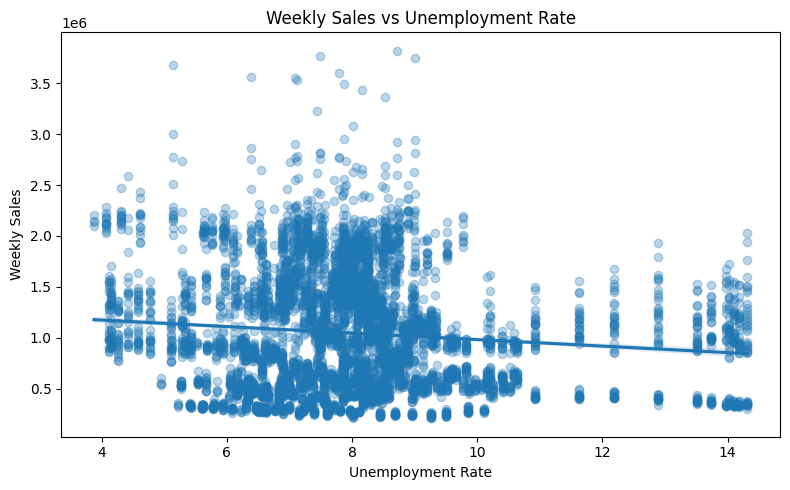

In [18]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Unemployment', y='Weekly_Sales', scatter_kws={'alpha':0.3})
plt.title('Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

###  How have weekly sales changed over time?

In [42]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

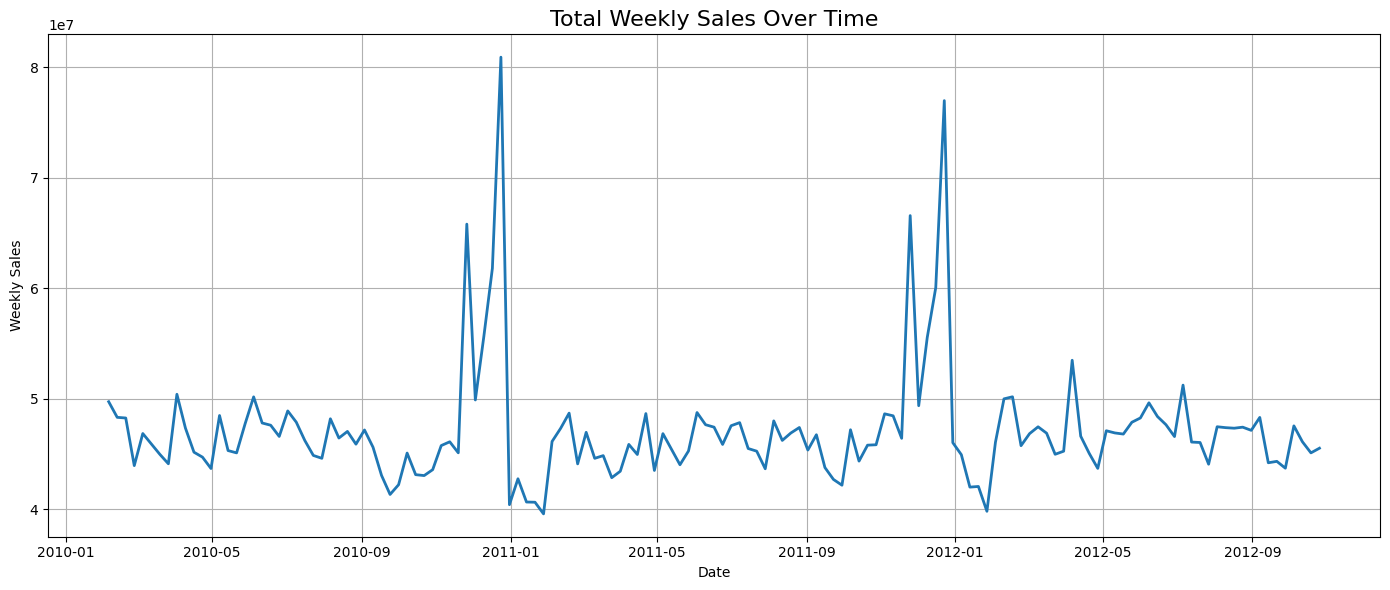

In [43]:
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], linewidth=2)
plt.title('Total Weekly Sales Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Do holidays impact sales

In [49]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

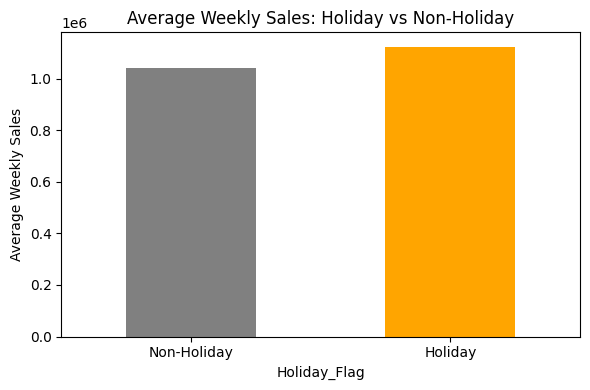

In [50]:
plt.figure(figsize=(6, 4))
holiday_sales.plot(kind='bar', color=['gray', 'orange'])
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()


### Analyze Sales Around Specific Holidays

In [51]:
holiday_dates = [
    '12-02-2010', '11-02-2011', '10-02-2012',  # Super Bowl
    '10-09-2010', '09-09-2011', '07-09-2012',  # Labor Day
    '26-11-2010', '25-11-2011', '23-11-2012',  # Thanksgiving
    '31-12-2010', '30-12-2011', '28-12-2012'   # Christmas week
]

holiday_dates = pd.to_datetime(holiday_dates, format='%d-%m-%Y')

In [52]:
holiday_weeks = df[df['Date'].isin(holiday_dates)]

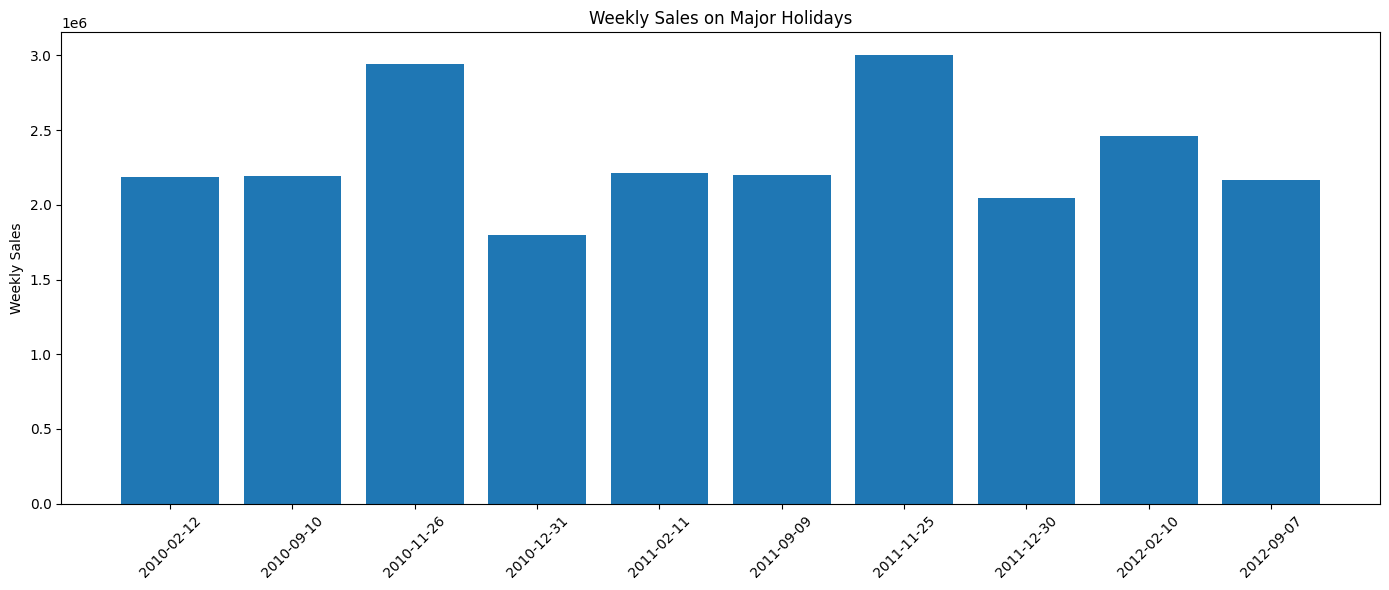

In [53]:
plt.figure(figsize=(14, 6))
plt.bar(holiday_weeks['Date'].dt.strftime('%Y-%m-%d'), holiday_weeks['Weekly_Sales'])
plt.title('Weekly Sales on Major Holidays')
plt.xticks(rotation=45)
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

###  Which stores have the highest average weekly sales

In [44]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

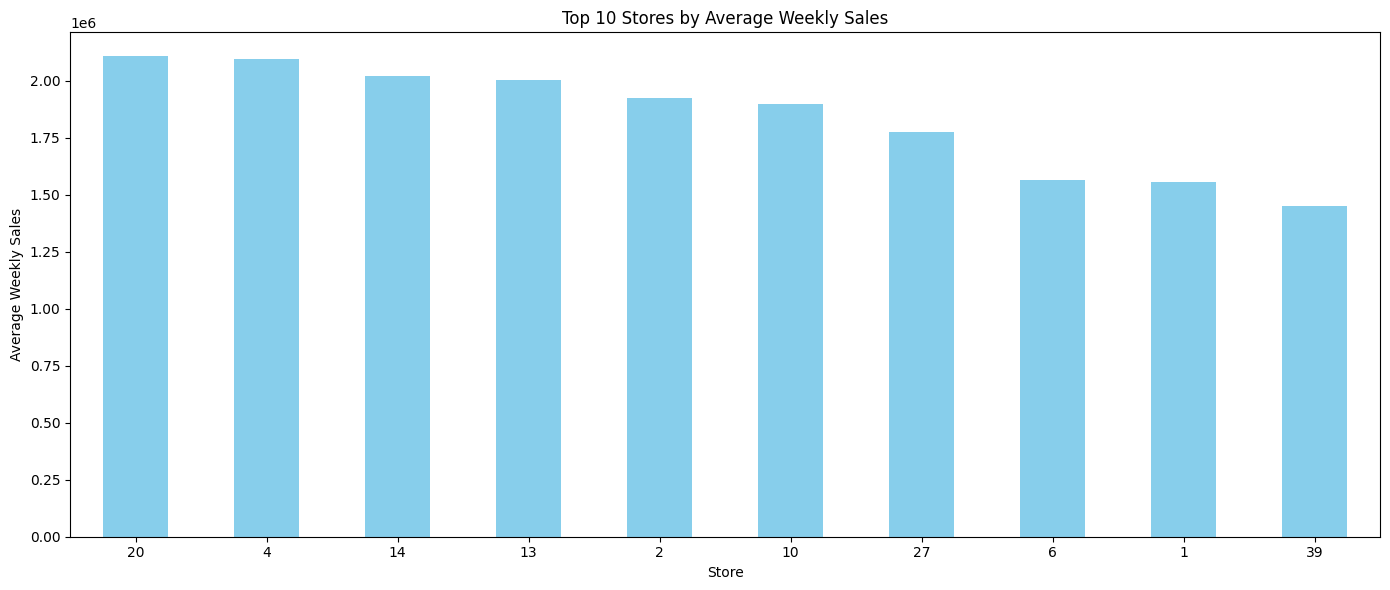

In [48]:
plt.figure(figsize=(14, 6))
store_sales.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Stores by Average Weekly Sales')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Store')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

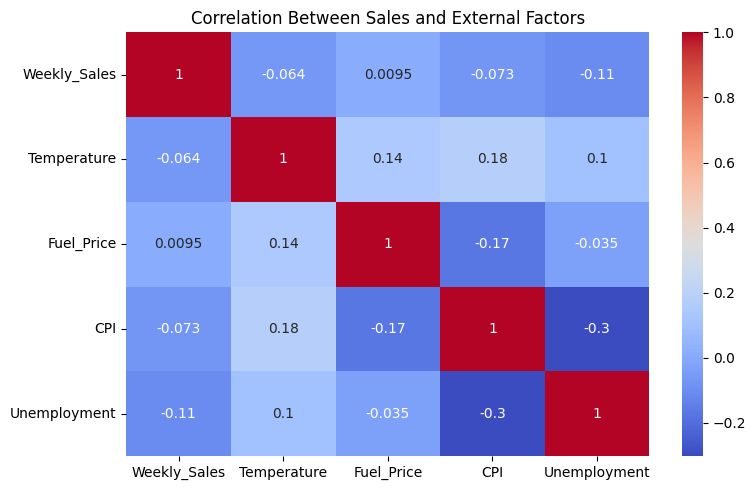

In [54]:
# Correlation matrix
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Heatmap-style visualization
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales and External Factors')
plt.tight_layout()
plt.show()